In [74]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [75]:
# Read the CSV file from the Resources folder into
lending_data = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [76]:
# Separate the data into labels and features


# Separate the y variable, the labels
y = lending_data['loan_status']

# Separate the X variable, the features
X = lending_data.drop('loan_status', axis=1)

In [77]:
# Review the y variable Series
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64

In [78]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [79]:
# Check the balance of our target values
lending_data['loan_status'].value_counts()



0    75036
1     2500
Name: loan_status, dtype: int64

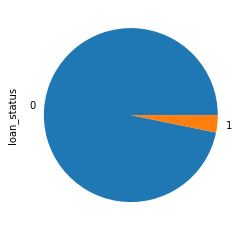

In [80]:
# I created a pie chart to visualise and emphasise that there are relatively few 'risky loans' in the dataset
lending_data['loan_status'].value_counts().plot(kind = 'pie')

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [81]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(58152, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [82]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', max_iter=200,random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=1)

In [83]:
# Though not specifically asked for I find it useful to see early on how the testing results compare nto the training results.
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [84]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [85]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)


0.9520479254722232

In [86]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[18663,   102],
       [   56,   563]])

In [87]:
# Print the classification report for the model
print(classification_report(y_test, predictions,
                            target_names=["healthy loan", "high risk loan"]))

                precision    recall  f1-score   support

  healthy loan       1.00      0.99      1.00     18765
high risk loan       0.85      0.91      0.88       619

      accuracy                           0.99     19384
     macro avg       0.92      0.95      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**
**On first sight** the predictions on healthy loans are very accurate and I would feel comfortable using the logistics regression model to determine if a loan is healthy. The predictions on risky loans is less accurate though classifying a loan that is risky when it is 'not risky' is a low risk outcome in a peer to peer platform.

**However**
As there is a relatively small number of risky loans (3%) in the dataset I do feel that there is a possibility that there is not enough data for the algorithm to classify a loan as risky and there could be the statistical chance that the algorithm produces a result that is more random than I feel comfortable with.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [88]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# I used the https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ to use RAndomOverSampler and to used Counter for the count.
from collections import Counter

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
oversample = RandomOverSampler(sampling_strategy='minority', random_state=1)


# Fit the original training data to the random_oversampler model
X_over, y_over = oversample.fit_resample(X, y)

In [89]:
# Count the distinct values of the resampled labels data
print(Counter(y_over))

Counter({0: 75036, 1: 75036})


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [90]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_oversampler = LogisticRegression(solver='lbfgs', max_iter=200,random_state=1)

# Fit the model using the resampled training data
classifier_oversampler.fit(X_over, y_over)

# Make a prediction using the testing data
predictions_oversampler = classifier_oversampler.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [91]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_oversampler)

0.9936781215845847

In [92]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions_oversampler)

array([[18649,   116],
       [    4,   615]])

In [93]:
# Print the classification report for the model
print(classification_report(y_test, predictions_oversampler, target_names=["healthy loan", "high risk loan"]))

                precision    recall  f1-score   support

  healthy loan       1.00      0.99      1.00     18765
high risk loan       0.84      0.99      0.91       619

      accuracy                           0.99     19384
     macro avg       0.92      0.99      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The predictions with the oversampled data are slightly better for the risky loans, especially the recall improved, which indicates that the model is better picking up the risky loans. Even though the precision and F1 haven't changed much I would feel more confident using the model with oversampled data.